# **A/B Test for MuscleHub**

**Project Goals**

Congratulations! You’ve been hired as the newest member of the data analytics team at MuscleHub, a fancy gym, and your first assignment is to run an A/B test!

Currently, when a MuscleHub visitor purchases a membership, they follow the following steps:

1) Take a fitness test with a personal trainer.

2) Fill out an application for the gym.

3) Send in their payment for their first month’s membership.





Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test.

Visitors are randomly be assigned to one of two groups:

Group A is still asked to take a fitness test with a personal trainer.

Group B skips the fitness test and proceed directly to the application.

Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A. So that the null and alternate hypotheses are as follows:

**Null Hypothesis** = There will no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.

**Alternate Hypothesis** = There will be more visitors in Group B that will purchase membership than visitors in Group A that will purchase membership.
The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be:

𝛼 = 0.05

You will help her analyze the data and create a presentation with your knowledge of conducting A/B testing with Python.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.

In [2]:
# Importing all 4 datasets
app =pd.read_csv('applications.csv')
app.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,12-08-2017
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,29-09-2017
2,Roberta,Acevedo,RA8063@gmail.com,female,15-09-2017
3,Darren,Acosta,DAcosta1996@hotmail.com,male,26-07-2017
4,Vernon,Acosta,VAcosta1975@gmail.com,male,14-07-2017


In [3]:
test =pd.read_csv('fitness_tests.csv')
test.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [4]:
pur =pd.read_csv('purchases.csv')
pur.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [5]:
visit =pd.read_csv('visits.csv')
visit.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


**We will not perform this test on all visitors but on the visitors who visited the gym on or after 7-1-17.**

In [6]:
visit = visit.loc[visit['visit_date'] >= '7-1-17']
visit.head()

,first_name,last_name,email,gender,visit_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17


**Merging all the tables to have only one table with following 8 columns**:

1) first_name

2) last_name

3) email

4) gender

5) visit_date

6) fitness_test_date

7) application_date

8) purchase_date

In [7]:
gym = visit.merge(test, on =['first_name','last_name','email','gender'], how='left').merge(app, on =['first_name','last_name','email','gender'], how='left')\
     .merge(pur, on =['first_name','last_name','email','gender'], how='left')

In [8]:
gym.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,04-07-2017,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,03-07-2017,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


**Dividing the dataset into 2 groups- A & B by creating new feature/variable - 'Group'**

In [9]:
gym['Group'] = gym['fitness_test_date'].apply(lambda x: 'A' if pd.notnull(x) else 'B')
gym.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,Group
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,04-07-2017,2017-07-04,B
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,03-07-2017,2017-07-05,A
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A


In [10]:
gym['Group'].value_counts()

Group
A    2504
B    2500
Name: count, dtype: int64

In [11]:
d=gym['Group'].value_counts(normalize=True)
d

Group
A    0.5004
B    0.4996
Name: proportion, dtype: float64

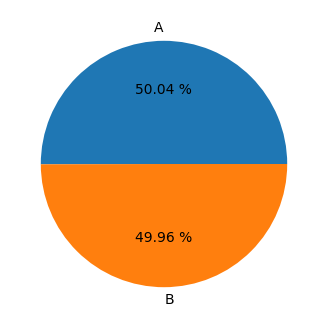

In [12]:
plt.figure(figsize=(5,4))
plt.pie(d,labels = d.index, autopct = '%1.2f %%')
plt.show()

<Axes: xlabel='Group', ylabel='count'>

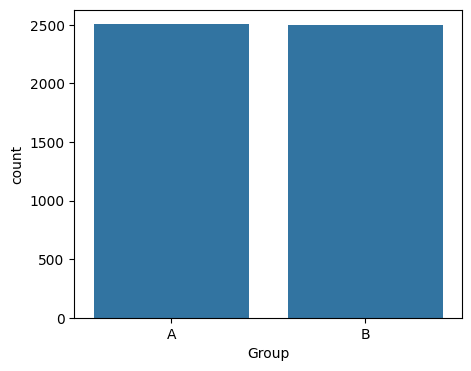

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x=gym['Group'])

In [14]:
gym['is_app'] = gym['application_date'].apply(lambda x: 'Application' if pd.notnull(x) else 'Not Application')

In [15]:
gym.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,Group,is_app
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,Not Application
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,Not Application
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,04-07-2017,2017-07-04,B,Application
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,03-07-2017,2017-07-05,A,Application
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,Not Application


**Determine the count of visitors who filled the application form**

Remember, the sign-up process at MuscleHub involves multiple steps:

1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

Determine the no. of people in each group who complete Step 2, filling out an application.

In [16]:
app_count = pd.crosstab(index=gym['Group'],columns=gym['is_app'],margins=True,margins_name='Total')
app_count = app_count.iloc[[0,1],:]
app_count

is_app,Application,Not Application,Total
Group,,,
A,250,2254,2504
B,325,2175,2500


In [17]:
app_count['Percentage'] = round(app_count['Application']*100/app_count['Total'],2)
app_count

is_app,Application,Not Application,Total,Percentage
Group,,,,
A,250,2254,2504,9.98
B,325,2175,2500,13.00


**Determining the statistical significance for the above results:**

The chi-square test is a statistical method used primarily to test the independence of two categorical variables in a contingency table, as well as for goodness-of-fit testing.

Here we also have 2 categorical features therefore chisquare test will be used.

In [18]:
from scipy.stats import chi2_contingency

In [19]:
observation = [[250,2254],[325,2175]]
p_value, stat_value, dof, expected = chi2_contingency(observation)
p_value, stat_value

(10.893961295282612, 0.0009647827600722304)

As the p-value < 0.05:

we reject null hypothesis : There is no difference between the visitors in Group A that filled out application and the visitors in Group B that filled out application.

So, there are more visitors in Group B that filled out application form than visitors in the Group A.

**Determining the count of members who filled the application form**

Among those who picked up an application, how many went on to purchase a membership?

Assess the number of individuals who secured a membership from the group that picked up applications

In [20]:
gym['is_member'] = gym['purchase_date'].apply(lambda x: 'Member' if pd.notnull(x) else 'Not member')
gym.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,Group,is_app,is_member
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,Not Application,Not member
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,Not Application,Not member
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,04-07-2017,2017-07-04,B,Application,Member
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,03-07-2017,2017-07-05,A,Application,Member
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,Not Application,Not member


In [21]:
app_mem_count = pd.crosstab(gym['Group'], gym.loc[gym['is_app']=='Application']['is_member'], margins=True, margins_name = 'Total')
app_mem_count = app_mem_count.iloc[[0,1],:]
app_mem_count

is_member,Member,Not member,Total
Group,,,
A,200,50,250
B,250,75,325


In [22]:
app_mem_count['Percentage'] = round(app_mem_count['Member']*100/app_mem_count['Total'],2)
app_mem_count

is_member,Member,Not member,Total,Percentage
Group,,,,
A,200,50,250,80.00
B,250,75,325,76.92


In [23]:
observation = [[200,50],[250,75]]
p_value, stat_value, dof, expected = chi2_contingency(observation)
p_value, stat_value

(0.615869230769231, 0.43258646051083327)

As the p-value > 0.05:

we fail to reject null hypothesis : There is no difference between the visitors in Group A that filled out application and the visitors in Group B that filled out application.

**Determining the count of memebers who visited the gym**

Earlier, we analyzed the percentage of individuals who collected applications and then proceeded to buy memberships.

Now, we need to calculate what percentage of the total visitors ended up purchasing memberships

In [24]:
mem_count = pd.crosstab(gym['Group'],gym['is_member'],margins=True,margins_name="Total")
mem_count = mem_count.iloc[[0,1],:]
mem_count

is_member,Member,Not member,Total
Group,,,
A,200,2304,2504
B,250,2250,2500


In [25]:
mem_count['Percentage'] = round(mem_count['Member']*100/mem_count['Total'],2)
mem_count

is_member,Member,Not member,Total,Percentage
Group,,,,
A,200,2304,2504,7.99
B,250,2250,2500,10.00


In [26]:
observation = [[200,2304],[250,2250]]
p_value, stat_value, dof, expected = chi2_contingency(observation)
p_value, stat_value

(5.949182292591156, 0.014724114645783203)

As the p-value < 0.05:

we reject null hypothesis : There is no difference between the visitors in Group A that purchased the membership and the visitors in Group B that purchased the membership.

So, there are more visitors in Group B that purchased the membership than visitors in the Group A.

**Visualisation of the results:**

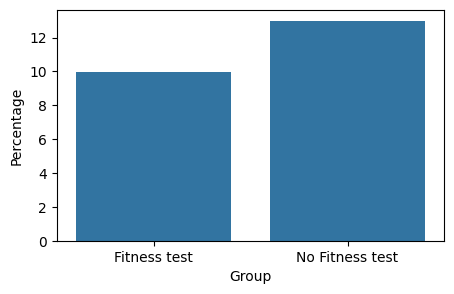

In [27]:
# Percentage of Visitors who filled the application form
import seaborn as sns
plt.figure(figsize=(5,3))
sns.barplot(app_count['Percentage'])
plt.xticks(ticks=[0,1],labels=['Fitness test','No Fitness test'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.show()

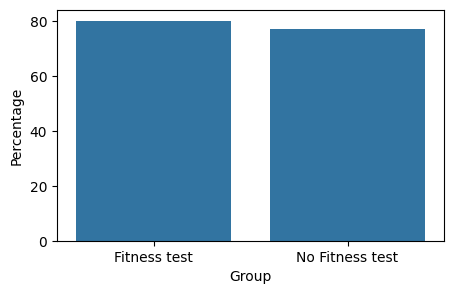

In [28]:
# Percentage of applications who purchased membership
import seaborn as sns
plt.figure(figsize=(5,3))
sns.barplot(app_mem_count['Percentage'])
plt.xticks(ticks=[0,1],labels=['Fitness test','No Fitness test'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.show()

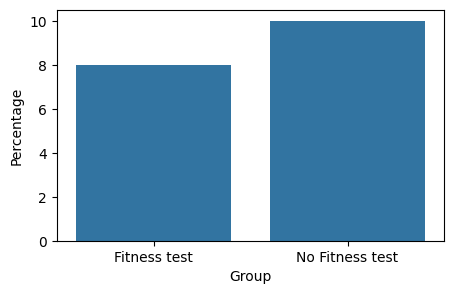

In [29]:
# Percentage of total visitors s who purchased membership
import seaborn as sns
plt.figure(figsize=(5,3))
sns.barplot(mem_count['Percentage'])
plt.xticks(ticks=[0,1],labels=['Fitness test','No Fitness test'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.show()

**Creating a visualisation that can be used for an ad with the data in file interviews.txt**

In [30]:
from wordcloud import WordCloud

In [31]:
# Open & read file interviews.txt
interview = open('interviews.txt','r')
content = interview.read()
print('The content of the file is :','\n','\n',content)

The content of the file is : 
 
 I always wanted to work out like all of the shredded people on the fitness accounts I see on Instagram, but I never really knew how to start. MuscleHub’s introductory fitness test was super helpful for me! After taking the fitness test, I had to sign up and keep coming back so that I could impress my trainer Rachel with how much I was improving!
- Cora, 23, Hoboken

When I walked into MuscleHub I wasn’t accosted by any personal trainers trying to sell me some mumbo jumbo, which I really appreciated. Down at LiftCity they had me doing burpees 30 seconds after I walked in the door and I was like “woah guys slow your roll, this is TOOOO much for Jesse!” I still ended up not signing up for a membership because the weight machines had all those sweat stains on them and you know, no thanks.
- Jesse, 35, Gowanes

I took the MuscleHub fitness test because my coworker Laura recommended it. Regretted it.
- Sonny "Dad Bod", 26, Brooklyn

I saw an ad for MuscleHub 

In [32]:
print('Number of words in the text file containing the interviews is :',len(content))

Number of words in the text file containing the interviews is : 1293


In [84]:
# Create the wordcloud
ad = WordCloud(width=1500,height=900, max_words=86,colormap='Set1',background_color ='midnightblue',min_font_size = 10).generate(content)

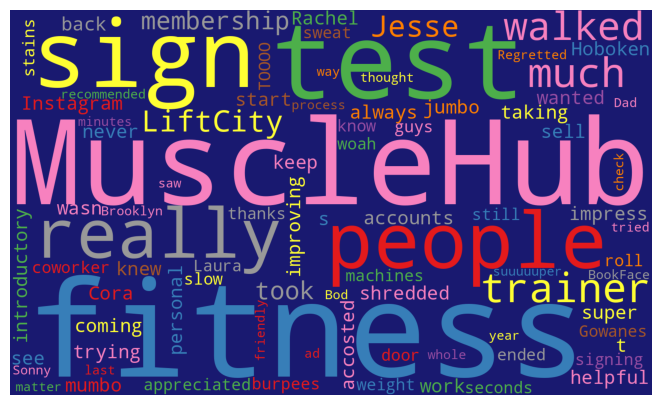

In [85]:
# Showing the wordcloud
plt.figure(figsize=(30,5))
plt.imshow(ad)
plt.axis('off')
plt.show()